# Blatt 8

## Nr. 1a)

### Was beschreibt die Lossfunktion?

Wir betrachten zwei Wahrscheinlichkeitsdichtefunktionen $p$ und $q$. Die Lossfunktion ergibt kleinere Werte für ähnliche Verteilungen $q$ und $p$. Bei einem Klassifizierungsproblem ist $p$ die wahre Verteilung der Klassen für ein gegebenes $x$, $q(x)$ ist die geschätzte Verteilung, die vom Machine-Learner erstellt wurde. Die Loss-Funktion gibt praktisch die Abweichung der geschätzen Verteilung von der wahren Verteilung an, die pro Entscheidung entsteht. Diese Abweichung soll in Klassifikationsproblemen minimiert werden.

### Wie kann sie minimiert werden?

Die Gewichtsmatrix $\mathbf{W}$ wird minimiert. Es kann z.B. zufällig nach Matrixeinträgen gesucht werden, die eine bessere Loss-Funktion erhalten. Es geht aber auch anders. 
Oft genügt es ein lokales Optimum zu finden. Das Problem kann auch konvex umformuliert werden. Dann findet der lokale Optimierer garantiert das globale Optimum.
Man kann es mit einem inkrementellen Ansatz verschen. Dabei behalten wir das beste gefundene $\mathbf{W}$ und fügen eine zufällige Richtung hinzu. Noch besser wird man, wenn man in jeder Iteration den Gradienten der Verlustfunktion verfolgt.

### Welche Funktion haben Aktivierungsfunktionen bzw. welche Probleme werden durch sie gelöst? 


Aktivierungsfunktion soll die Aktivierung eines biologischen Neurons simulieren. Sie bestimmt die Ausgabe des künstlichen Neurons. Als Aktivierungsfunktion können nichtlineare Funktionen verwendet werden, die den Raum verzerren und somit auch linear nicht lösbare Probleme lösbar machen, ohne die Komplexität des Netzes zu erhöhen.

Gängige Aktivierungsfunktionen sind die Sigmoid-Funktion, der Tangens Hyperbolicus uns ReLu (Rectified Linear Unit).

Sie werden benutzt um in der End-/Ausgabeschicht eines Nezwerks Wahrscheinlichkeitsschätzungen anzustellen.

### Was ist ein Neuron?

Ein Neuron ist das Basisobjekt für neuronale Netze. Es kann Eingaben verarbeiten und reagieren. Ein Neuron kann durch vier Basiselemente beschrieben werden:
* Gewichtung: Die Gewichte bestimmen den Grad ds Einflusses den die Eingaben des Neurons in der Berechnung einnimmt.
* Übertragungsfunktion: Berechnet Anahnd der Gewichtung der Eingabe die Netzeingabe.
* Aktivierungsfunktion: Bestimmt die Ausgabe. Wird beeinflusst durch die Netzeingabe und einem Schwellwert.
* Schwellwert: Addieren eines Schwellenwerts verschiebt die gewichtete Eingabe. 

### Hier drei Anwendungsbeispiele für Neuronale Netze.

* Gesichtserkennung
* Spracherkennung
* Autonomes Fahren

Geberell sind neuronale Netze immer besonders sinnvoll, wenn wenig a priori Wissen über das Problem vorliegt und eine große Datenmenge verarbeitet werden muss, um wenige Ergebnisse zu erhalten.

## Nr. 2

### a) 
Dimensionen:
* $x_i = 1\times M $ 
* $C = 1\times 1 $
* $W = M\times K$
* $b = 1\times K$ 
* $\nabla_{W} \hat{C} = K \times M $
* $\nabla_{f_{i}} \hat{C} = K \times 1 $
* $\frac{\partial f_{k,i}}{\partial W} = M \times K $
* $\frac{\partial f_{k,i}}{\partial b} = 1 \times K $

### b)

$\nabla_{f_{a,i}} C\left(f\right) = 
\frac{1}{m} \sum_{i=1}^{m} \left[ \sum_{k=1}^{K} -\mathbf{1}(y_i = k) \nabla_{f_{a,i}} \log\left(\frac{\exp\left(f_{k,i}\right)}{\sum_{j} \exp\left(f_{j,i}\right) }\right) \right] \\
= \frac{1}{m} \sum_{i=1}^{m} \left[-\mathbf{1}(y_i = a) \nabla_{f_{a,i}} \log\left(\frac{\exp\left(f_{k,i}\right)}{\sum_{j} \exp\left(f_{j,i}\right) }\right) \right] \\
= \frac{1}{m} \sum_{i=1}^{m} \left[-\mathbf{1}(y_i = a) \left(\frac{\sum_{j} \exp\left(f_{j,i}\right) }{\exp\left(f_{a,i}\right)}\right) \frac{\partial}{\partial f_{a,i}} \left(\frac{\exp\left(f_{k,i}\right)}{\sum_{j} \exp\left(f_{j,i}\right) }\right)  \right] \\
= \frac{1}{m} \sum_{i=1}^{m} \left[-\mathbf{1}(y_i = a) \left(\frac{\sum_{j} \exp\left(f_{j,i}\right) }{\exp\left(f_{a,i}\right)}\right) \cdot \left(\frac{\exp\left(f_{a,i}\right) \cdot \sum_{j} \exp\left(f_{a,i}\right) - {\exp\left(f_{a,i}\right)}^2}{\left(\sum_{j} \exp\left(f_{j,i}\right)\right)^{2} }\right)  \right] \\
= \frac{1}{m} \sum_{i=1}^{m} \left[\frac{\exp\left(f_{a,i}\right)}{\sum_{j} \exp\left(f_{j,i}\right) } -\mathbf{1}(y_i = a) \right]$

### c) 

Mit $ f_{k,i} = W_k x_i + b_k $ 
ergibt sich die Ableitung von $f_{k,i}$ nach $W_a$ zu 

$$ \nabla_{W_a} f_{k,i} = \nabla_{W_a}\left(W_k x_i + b_k \right) = \delta_{ak} x_i^T $$

und die Ableitung nach $b_a$ zu 

$$ \nabla_{b_a} f_{k,i} = \nabla_{b_a}\left(W_k x_i + b_k \right) = \delta_{ak}. $$

### d) 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from tqdm import tqdm

Im Folgenden werden die Daten eingelesen und zu einem Array zusammengefügt. Außerdem werden labels erzeugt. 

In [2]:
df0 = pd.read_hdf("populationen.hdf5", key="P_0")
df1 = pd.read_hdf("populationen.hdf5", key="P_1")
y = np.concatenate([np.zeros(len(df0)), np.ones(len(df1))])
X = pd.concat([df0, df1]).values

Hier einmal die beiden Verteilungen abgebildet.

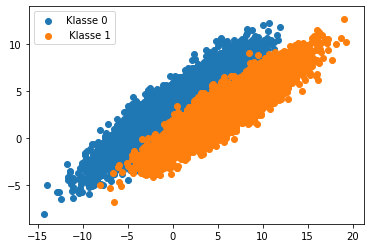

In [3]:
plt.scatter(X[:9999,0], X[:9999,1], label="Klasse 0")
plt.scatter(X[10000:,0], X[10000:,1], label=" Klasse 1")
plt.legend(loc="best")
None

Nun wird die Anzahl der Klassen, Population 1 oder 2 festgelegt. Außerdem wird die learning rate, hier mit step_size bezeichnet beschrieben, festgelegt und die Matrix W und der Bias Vektor b werden initialisiert. 

In [4]:
#learning rate h= 0.5, 100 Epochen, 2 Klassen K (1 oder 0), p (x und y)
K = 2
p = 2
step_size = 0.5
#initialise W and b 
np.random.seed(45)
W = np.random.normal(size=(p, K)) 
b = np.random.normal(size=(p,1))

Hier passieren mehrere Dinge. Ich werde dies im Code beschreiben. 

In [5]:
def softmax(f, k): # Softmax Funktion wie beschrieben initialisiert. Es wird ein Vektor erzeugt, dessen einzelne Werte jeweils den Wert e hoch f(i) entsprechen, geteilt durch denselbigen Wert plus den Wert e hoch f(i) der jeweils anderen Klasse. Mit k wird die jeweilige Klasse beschrieben, aus der der jeweilige Datenpunkt kommt. 
    q = np.exp(f[:,k]).T/(np.exp(f[:,0])+np.exp(f[:,1]))
    return q.T

def indicator(y, k): # Indikatorfunktion. Ist quasi delta(y(i),k) wobei k der Klasse entspricht und y(i) den jeweiligen Samples unserer Werte. Es wird ein "True" zurückgegeben, falls diese Bedingung erfüllt ist und ein "False", falls nicht, was in einer Rechnung wie dieser hier einer 1 bzw. 0 entspricht.
    return y == k


def iteration(W, b, X, y, step_size, num):
    f = ((X@W).T + b).T # Bestimmen der f Werte, also unserer Ergebnisse nach anwenden des Neurons auf unsere Eingangsdaten.
    W_new1, b_new1, f_new1 = W, b, f # neue Variablen für die for-Schleife
    
    for i in range(num): #num ist die Anzahl der gewünschten Durchläufe
        grad_WC = np.array([[(softmax(f_new1, 0)- indicator(y, 0)).T @ X[:,0], #Dies ist eigentlich der spannendste Schritt. Der Gradient W zu C wird gebildet, also die Matrix, die später als Produkt mit der learning_rate zur aktuellen W-Matrix hinzugefügt wird. Dafür haben wir die einzelnen Komponenten berechnet.  
                             (softmax(f_new1, 0)- indicator(y, 0)).T @ X[:,1]], # In den jeweiligen Ecken der Matrix wird (softmax(f,i) -indicator(i) für alle i, also hier 20000 Elemente berechnet) und anschließend mit den dazugehörigen x-Werten multipliziert. 
                            [(softmax(f_new1, 1)- indicator(y, 1)).T @ X[:,0], # Dies wird für alle vier Ecken wiederholt.
                             (softmax(f_new1, 1)- indicator(y, 1)).T @ X[:,1]]])/len(X[:,1]) # Am Ende wird durch die Anzahl aller Elemente geteilt, wegen des 1/m in der Formel im Skript.
        grad_bC = np.array([[np.mean((softmax(f_new1,0)- indicator(y,0)).T)], # Hier wird auch nach der Formel aus 2c) der Gradient b C berechnet. 
                            [np.mean((softmax(f_new1,1)- indicator(y,1)).T)]])
        W_new2 = W_new1 - step_size*grad_WC # Parameterupdate für W
        b_new2 = b_new1 - step_size*grad_bC # Parameterupdate für b
        f_new1 = ((X@W_new2).T + b_new2).T # Parameterupdate für f
        W_new1 = W_new2
        b_new1 = b_new2
        print(f_new1[1])
    return W_new1, b_new1, f_new1

In [6]:
W_new, b_new, f_new = iteration(W, b, X, y, step_size, 30)

[-1.05011189 -5.23430634]
[-1.23341262 -6.31620182]
[-1.56745737 -7.27633459]
[-1.96316306 -8.16093666]
[-2.39093081 -8.99265956]
[-2.83753416 -9.78469505]
[ -3.2960539  -10.54554761]
[ -3.76248982 -11.28108643]
[ -4.23436285 -11.99556602]
[ -4.71005593 -12.69218749]
[ -5.18847218 -13.37343088]
[ -5.66884425 -14.04126355]
[ -6.15062191 -14.69727683]
[ -6.63340259 -15.34277919]
[ -7.11688689 -15.97886158]
[ -7.60084907 -16.60644463]
[ -8.08511707 -17.22631342]
[ -8.56955854 -17.83914368]
[ -9.054071   -18.44552173]
[ -9.53857463 -19.04596015]
[-10.02300707 -19.64090991]
[-10.50731951 -20.23077023]
[-10.99147375 -20.81589637]
[-11.47543993 -21.39660606]
[-11.95919488 -21.97318476]
[-12.44272067 -22.54589001]
[-12.92600368 -23.11495502]
[-13.4090337  -23.68059176]
[-13.89180327 -24.24299352]
[-14.3743072 -24.8023371]


Leider gibt es ein Problem, dessen Ursache wir ärgerlicher Weise nicht gefunden haben.

Die Normierung scheint aus irgendeinem Grund nicht zu funktionieren. Langes Durchlaufen und Beobachten der f Werte hat ergeben, dass die Werte, anstatt gegen Werte zwischen 1 und 0 zu laufen, aus irgendeinem Grund divergieren und je nach Durchlauf immer weiter gegen undendlich gehen, bis sie irgendwann bei -400 sind und dann die softmax Funktion nur noch nan's rausgibt. 

Auffällig ist außerdem, dass die W Matrix für hohe Durchläufe gegen folgendes Muster konvergiert. 

 (a,  b // -a, -b )

Dies könnte mit den divergierenden Werten zusammenhängen, aber vielleicht auch nicht? Keine Ahnung. Wir haben Stunden damit verbracht, weil wir sicher waren, dass der Lösungsweg eigentlich nicht falsch ist, konnten aber den Fehler, den wir irgendwo machen, leider nicht lokalisieren.

Wir haben die restlichen Schritte versucht trotzdem nachzuvollziehen und trotz unserer falschen Daten durchzuführen.

In [11]:
print(W_new)

[[ 2.40255226  4.27431468]
 [-2.77132303 -4.21829389]]


$f_0$ = $f_1$ gilt, da die dies genau die Punkte auf der Gerade beschreibt, die zwischen Klasse $0$ und Klasse $1$ liegen und somit alle anderen Werte perfekt trennen. Diese Bedingung konnte dann benutzt werden um die Geradengleichung aufzustellen, wenn man 

(x, y) * W + b = (0.5, 0.5) 

nach y umgestellt hat und dann x einsetzt.

In [8]:
x_gerade = np.linspace(-20,20,2000) #Erzeugen der x Werte und anschließendes Erzeugen der Gerade 
y_gerade = -(W_new[:,1].T@W_new[:,0]).T *x_gerade +W_new[:,1].T@(np.array([0.5,0.5])-b_new[:,0])

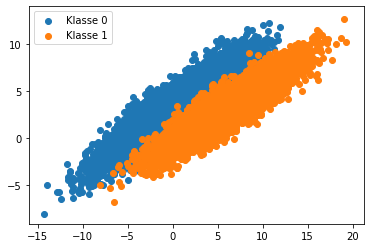

In [9]:
plt.scatter(X[:9999,0], X[:9999,1], label="Klasse 0") 
plt.scatter(X[10000:,0], X[10000:,1], label="Klasse 1")
#plt.plot(x_gerade, y_gerade, label="Gerade")
plt.legend(loc="best")
None

Wie man sieht, werden die Werte halbwegs richtig getrennt, aber leider nicht gut genug, was an den Fehlern in unserer Schleife liegt.

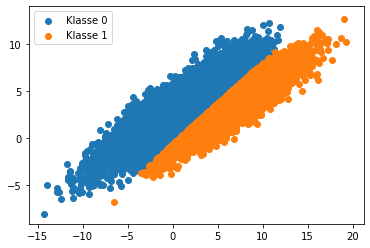

In [10]:
x1 = X[:,0]
x2 = X[:,1]
plt.scatter(x1[f_new[:,0]<0.5], x2[f_new[:,0]<0.5], label="Klasse 0")
plt.scatter(x1[f_new[:,0]>=0.5], x2[f_new[:,0]>=0.5], label="Klasse 1") 
#plt.plot(x_gerade, y_gerade, label="Gerade")
plt.legend(loc="best")
None